# Task # 2 - To Explore Supervised Machine Learning


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
url= 'http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualise the data

Text(0, 0.5, 'Scores')

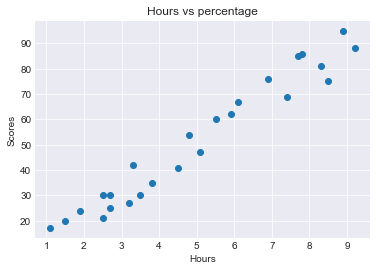

In [3]:
from scipy import stats

plt.style.use('seaborn-darkgrid')

plt.scatter(df.Hours,df.Scores)
plt.title('Hours vs percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')

# summary of statistics pertaining to the DataFrame columns.



In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df1 = df.corr()
df1.head()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting the data into training and test set by using method train test split

In [6]:
x=df.Hours.values.reshape(-1, 1)
y=df.Scores.values

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

Training the algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression().fit(x_train, y_train)


# Visualising the trained set and test set

<function matplotlib.pyplot.show(*args, **kw)>

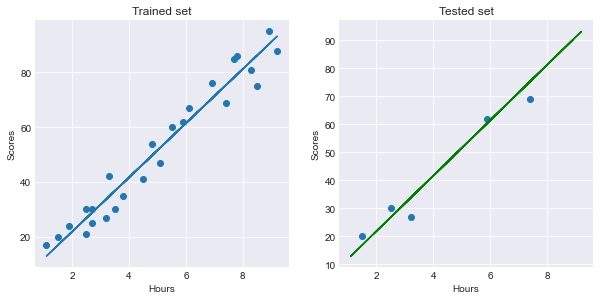

In [9]:
fig=plt.figure(figsize =(10,10))
ax1 =plt.subplot(221)
ax2 =plt.subplot(222)


line = regress.coef_*x+regress.intercept_

ax1.scatter(x,y)
ax1.plot(x,line)
plt.show
ax1.set_title('Trained set')
ax1.set_xlabel('Hours')
ax1.set_ylabel('Scores')

ax2.scatter(x_test,y_test)
ax2.plot(x_train,regress.predict(x_train),c='g')
ax2.set_title('Tested set')
ax2.set_xlabel('Hours')
ax2.set_ylabel('Scores')

plt.show


In [10]:
predicted_y = regress.predict(x_test)

In [11]:
df2= pd.DataFrame({'Actual':y_test,'Predicted':predicted_y})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


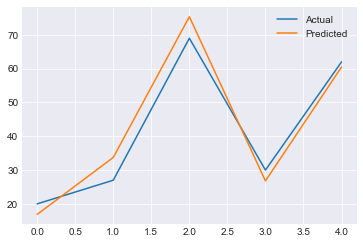

In [12]:
df2.plot(kind='line')

# predicting the Scores of a student according the the hours studied

In [16]:

hours=float(input('Enter the no. of hours: '))
own_pred = regress.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no. of hours: 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


# evaluating the Model performance

R Sqared method:R Square measures how much of variability in dependent variable can be explained by the model.The r value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.





In [41]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress( y_test,predicted_y)
print('R-sqaured error:',r)


R-sqaured error: 0.9806835759589493


Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily

In [45]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, predicted_y))
print(math.sqrt(mean_squared_error(y_test, predicted_y)))

21.5987693072174
4.6474476121003665
